### Exercici 1
#### Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" (fes una còpia i executa els comandaments amb el mateix dataset county.txt). Aquest exercici consisteix a observar les diferents possibilitats que ofereixen les diferents llibreries de visualització gràfica.



03 EXAMINING DATA

### Exercici 2
#### Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

In [287]:
import numpy as np
import pandas as pd

In [288]:
cine= pd.read_csv ("/Users/esthersanroma/Desktop/DATA SCIENCES/PRE-PROCESSING-DATA-main 2/movies.dat",sep = '::',
                     usecols=[1, 2],
                     names = ["Titol", "genere"],
                     encoding="iso-8859-1",
                     engine="python")
cine.head()

,Titol,genere
0,Toy Story (1995),Animation|Children's|Comedy
1,Jumanji (1995),Adventure|Children's|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama
4,Father of the Bride Part II (1995),Comedy


Dividim la columna Genere, en Genere 1 i Genere 2

In [289]:
cine[["genere1","genere2"]]=cine["genere"].str.split("|",n=1,expand=True)

Necesitem sols Genere 1, esborrem la Genere i Genere 2

In [290]:
cine.drop(columns=["genere", "genere2"], inplace=True)

In [291]:
cine.head()

,Titol,genere1
0,Toy Story (1995),Animation
1,Jumanji (1995),Adventure
2,Grumpier Old Men (1995),Comedy
3,Waiting to Exhale (1995),Comedy
4,Father of the Bride Part II (1995),Comedy


Separem de titol, l'any 

In [292]:
cine['Any']=cine.Titol.str.slice(-5,-1)
cine.head()

,Titol,genere1,Any
0,Toy Story (1995),Animation,1995
1,Jumanji (1995),Adventure,1995
2,Grumpier Old Men (1995),Comedy,1995
3,Waiting to Exhale (1995),Comedy,1995
4,Father of the Bride Part II (1995),Comedy,1995


Separem de la columna titol, sols titol

In [293]:
cine['Titol'] = cine.Titol.str.slice(0,-6)
cine.head()

,Titol,genere1,Any
0,Toy Story,Animation,1995
1,Jumanji,Adventure,1995
2,Grumpier Old Men,Comedy,1995
3,Waiting to Exhale,Comedy,1995
4,Father of the Bride Part II,Comedy,1995


Passem columna Any a int64

In [294]:
cine.Any= cine.Any.astype('int64')

In [295]:
print(cine.columns)

Index(['Titol', 'genere1', 'Any'], dtype='object')


In [296]:
cine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Titol    3883 non-null   object
 1   genere1  3883 non-null   object
 2   Any      3883 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [297]:
cine.isnull().sum()

Titol      0
genere1    0
Any        0
dtype: int64

In [298]:
cine.describe()

,Any
count,3883.000000
mean,1986.066959
std,16.895690
min,1919.000000
25%,1982.000000
50%,1994.000000
75%,1997.000000
max,2000.000000


### Exercici 3
#### Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.

In [299]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [300]:
cine.genere1.value_counts()

Drama          1176
Comedy         1024
Action          503
Horror          262
Adventure       155
Crime           131
Documentary     123
Thriller        101
Animation        90
Children's       89
Romance          50
Sci-Fi           46
Mystery          36
Western          33
Film-Noir        25
Musical          25
War              12
Fantasy           2
Name: genere1, dtype: int64

Text(0.5, 0, 'Quantitat')

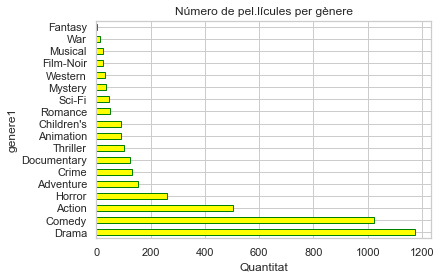

In [318]:
generes=cine.genere1.value_counts()
generes.plot.barh(color="yellow",edgecolor="green")
plt.ylabel("genere1")
plt.title("Número de pel.lícules per gènere")
plt.xlabel("Quantitat")

Text(0.5, 0, '')

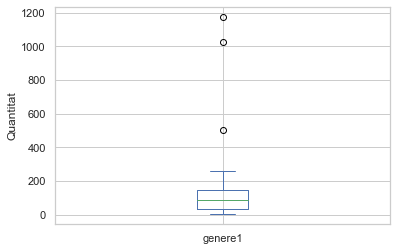

In [319]:
generes.plot.box()
plt.ylabel("Quantitat")
plt.xlabel("")

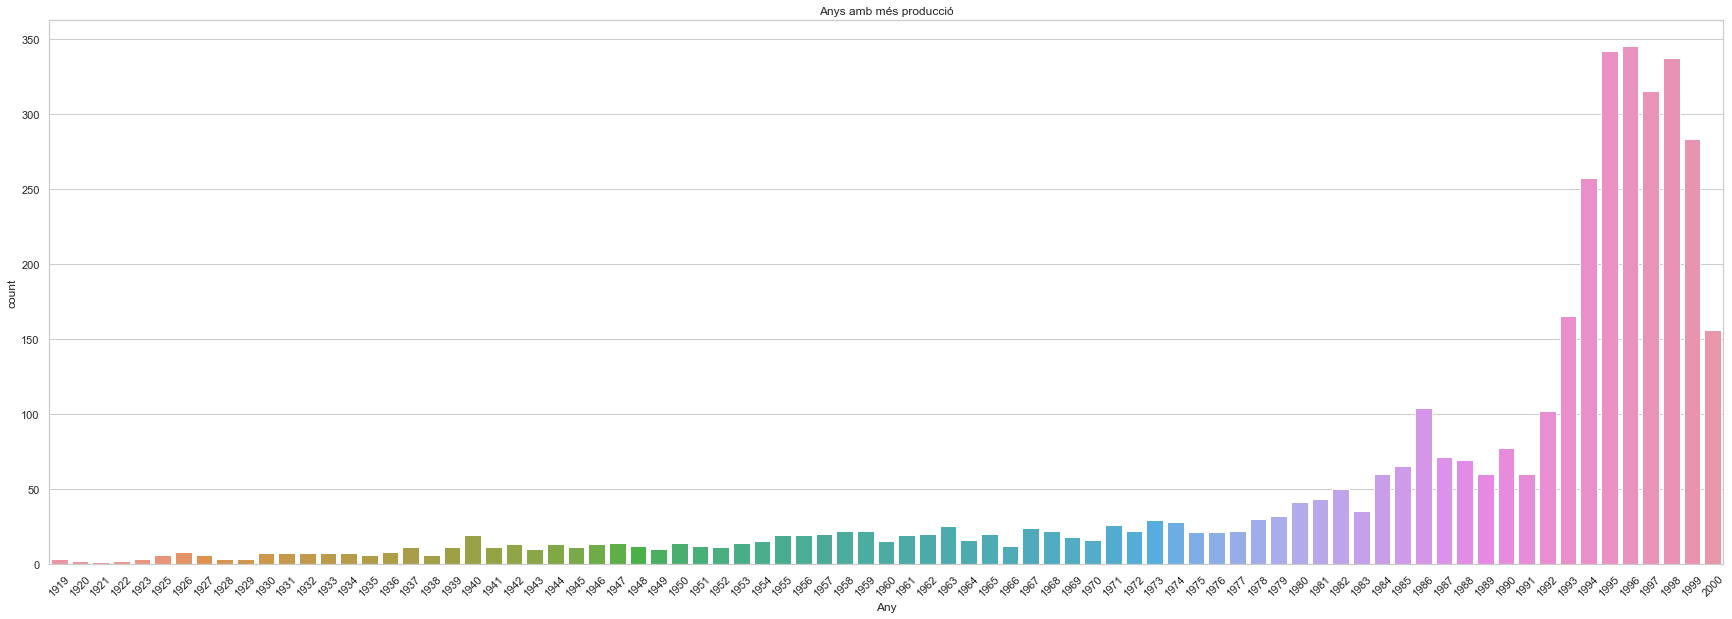

In [323]:
plt.figure(figsize=(30, 10))
sns.countplot(x='Any', data=cine);
plt.xticks(rotation=45)
plt.title("Anys amb més producció");


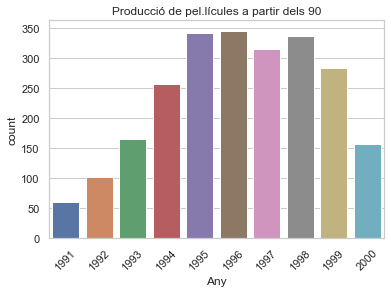

In [317]:
sns.set(style="whitegrid")
sns.countplot(x='Any', data=cine[cine.Any>1990]);
plt.xticks(rotation=45)
plt.title("Producció de pel.lícules a partir dels 90");